# 기울기

### 기울기 소실 문제

In [1]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

np.random.seed(0)
weights = np.random.randn(10, 10) * 0.01
x = np.random.randn(10, 1)

for i in range(1, 11):
    x = sigmoid(np.dot(weights, x))
    print(f"{i}번째 총 출력 평균: {np.mean(x)}")

# 출력 값의 변화가 거의 없다. = 기울기의 변화도 거의 없다.

1번째 총 출력 평균: 0.4923981391662232
2번째 총 출력 평균: 0.5007433168636295
3번째 총 출력 평균: 0.5007308165030734
4번째 총 출력 평균: 0.5007305713032845
5번째 총 출력 평균: 0.5007305725302615
6번째 총 출력 평균: 0.5007305725406197
7번째 총 출력 평균: 0.5007305725405601
8번째 총 출력 평균: 0.5007305725405591
9번째 총 출력 평균: 0.5007305725405591
10번째 총 출력 평균: 0.5007305725405591


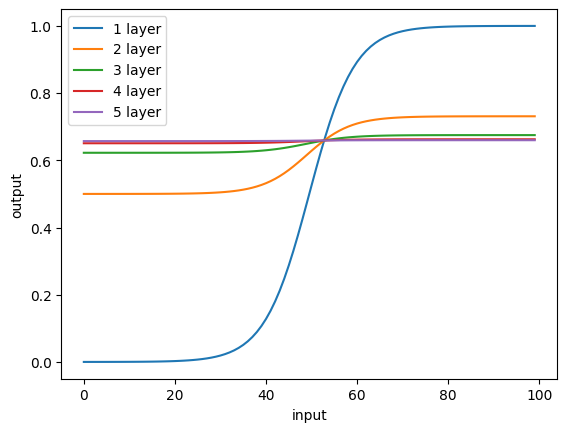

In [2]:
# 시그모이드로 시각화
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)

for i in range(1, 6):
    x = sigmoid(x)  
    plt.plot(x, label=f'{i} layer')

plt.xlabel("input")
plt.ylabel("output")
plt.legend()
plt.show()

- 활성화 함수 변경

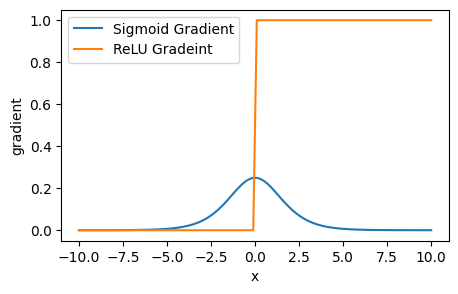

In [3]:
def relu(x):
    return np.maximum(0, x)

def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu_grad(x):
    return np.where(x > 0, 1, 0)

x = np.linspace(-10, 10, 100)

plt.figure(figsize=(5, 3))
plt.plot(x, sigmoid_grad(x), label="Sigmoid Gradient")
plt.plot(x, relu_grad(x), label="ReLU Gradeint")
plt.xlabel('x')
plt.ylabel('gradient')
plt.legend()
plt.show()

# 시그모이드 : 끝에 갈수록 기울기가 0 = 학습이 0
# 렐루 : 양수에서는 기울기 소실 문제 해결

- 잔차 연결(Residual Connection) 효과

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim     # 최적화 함수 optimizer

In [5]:
# 신경망
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(10, 10)
        self.layer2 = nn.Linear(10, 10)

    def forward(self, x):
        return self.layer2(torch.relu(self.layer1(x)))

In [6]:
# 신경망
class ResidualNN(nn.Module):
    def __init__(self):
        super(ResidualNN, self).__init__()
        self.layer = nn.Linear(10, 10)

    def forward(self, x):
        return x + torch.relu(self.layer(x))

In [7]:
# 좀 더 깊은 신경망 구조
class DeepResidualNN(nn.Module):
    def __init__(self):
        super(DeepResidualNN, self).__init__()
        self.layer1 = nn.Linear(10, 10)
        self.layer2 = nn.Linear(10, 10)
        self.layer3 = nn.Linear(10, 10)

    def forward(self, x):
        residual = x
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x + residual

In [8]:
simple_model = SimpleNN()
resdual_model = ResidualNN()

X = torch.randn(1, 10)

simple_output = simple_model(X)
residual_output = resdual_model(X)

print(F"입력값 - 일반 신경망: {X - simple_output}")
print(F"입력값 - 잔차연결 신경망: {X - residual_output}")

입력값 - 일반 신경망: tensor([[-0.7587, -0.0942, -1.1985, -0.9640, -0.2681, -0.5897,  0.8469, -0.8814,
          0.8365, -0.9201]], grad_fn=<SubBackward0>)
입력값 - 잔차연결 신경망: tensor([[ 0.0000, -0.5676, -0.6338,  0.0000, -0.3643, -1.1824,  0.0000, -0.1591,
         -0.4508, -0.4029]], grad_fn=<SubBackward0>)


In [9]:
# 기울기 변화

# 데이터 생성
X = torch.randn(100, 10)
y = torch.randn(100, 10)

# 모델 생성
sim_model = SimpleNN()
res_model = ResidualNN()
deep_res_model = DeepResidualNN()

# 손실함수, 옵티마이저 생성
criterion = nn.MSELoss()
sim_optim = optim.Adam(sim_model.parameters(), lr=0.01)
res_optim = optim.Adam(res_model.parameters(), lr=0.01)
deep_res_optim = optim.Adam(deep_res_model.parameters(), lr=0.01)

In [10]:
# 학습 루프
epochs = 100
loss_sim_list = []
loss_res_list = []
deep_res_loss_list = []

for epoch in range(epochs):

    sim_optim.zero_grad()                   # 가중치 초기화
    sim_output = sim_model(X)               # 순전파
    sim_loss = criterion(sim_output, y)     # 손실 계산
    sim_loss.backward()                     # 역전파
    sim_optim.step()                        # 가중치 업데이트
    loss_sim_list.append(sim_loss.item())   # 손실값 append

    res_optim.zero_grad()                   # 가중치 초기화
    res_output = res_model(X)               # 순전파
    res_loss = criterion(res_output, y)     # 손실 계산
    res_loss.backward()                     # 역전파
    res_optim.step()                        # 가중치 업데이트
    loss_res_list.append(res_loss.item())   # 손실값 append

    deep_res_optim.zero_grad()                   # 가중치 초기화
    deep_res_output = deep_res_model(X)          # 순전파
    deep_loss = criterion(deep_res_output, y)    # 손실 계산
    deep_loss.backward()                         # 역전파
    deep_res_optim.step()                        # 가중치 업데이트
    deep_res_loss_list.append(deep_loss.item())  # 손실값 append

In [11]:
print(f"일반 신경망 최종 손실값: {loss_sim_list[-1]:.4f}")
print(f"잔차 연경 신경망 최종 손실값: {loss_res_list[-1]:.4f}")
print(f"더 깊은 잔차 연결 신경망 최종 손실값: {deep_res_loss_list[-1]:.4f}")

일반 신경망 최종 손실값: 0.8176
잔차 연경 신경망 최종 손실값: 1.4632
더 깊은 잔차 연결 신경망 최종 손실값: 0.8841


In [12]:
# 학습시킨 모델의 파라미터 끄집어 내기
for param in sim_model.parameters():
    print(f"일반 신경망 기울기 크기: {param.grad.norm()}")

for param in res_model.parameters():
    print(f"잔차 연결 신경망 기울기 크기: {param.grad.norm()}")

for param in deep_res_model.parameters():
    print(f"더 깊은 잔차연결 신경망 기울기 크기: {param.grad.norm()}")

일반 신경망 기울기 크기: 0.05102253705263138
일반 신경망 기울기 크기: 0.012977257370948792
일반 신경망 기울기 크기: 0.012275981716811657
일반 신경망 기울기 크기: 0.005126722157001495
잔차 연결 신경망 기울기 크기: 0.0690118670463562
잔차 연결 신경망 기울기 크기: 0.01300193089991808
더 깊은 잔차연결 신경망 기울기 크기: 0.041735369712114334
더 깊은 잔차연결 신경망 기울기 크기: 0.018735025078058243
더 깊은 잔차연결 신경망 기울기 크기: 0.03407670930027962
더 깊은 잔차연결 신경망 기울기 크기: 0.010172971524298191
더 깊은 잔차연결 신경망 기울기 크기: 0.0405622236430645
더 깊은 잔차연결 신경망 기울기 크기: 0.020049121230840683
